# nag v3  deneme yanilma

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# resim verisini tek kanala dusur ve normalize et

rgb_weights = [0.2989, 0.5870, 0.1140]

trainX = np.dot(trainX[...,:3], rgb_weights)
testX = np.dot(testX[...,:3], rgb_weights)

trainX = trainX / 255.0
testX = testX / 255.0

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32)
(50000, 1)
(10000, 32, 32)
(10000, 1)


In [4]:
model = models.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.Input(shape=(32, 32)))
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 558,282
Trainable params: 558,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(trainX, trainY, epochs=15, 
                    validation_data=(testX, testY), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 78us/sample - loss: 2.2001 - acc: 0.1675 - val_loss: 2.0756 - val_acc: 0.2237
Epoch 2/15
50000/50000 [==============================] - 4s 77us/sample - loss: 2.0090 - acc: 0.2610 - val_loss: 1.9557 - val_acc: 0.2817
Epoch 3/15
50000/50000 [==============================] - 4s 77us/sample - loss: 1.9270 - acc: 0.3035 - val_loss: 1.9117 - val_acc: 0.3153
Epoch 4/15
50000/50000 [==============================] - 4s 77us/sample - loss: 1.8715 - acc: 0.3266 - val_loss: 1.8477 - val_acc: 0.3392
Epoch 5/15
50000/50000 [==============================] - 4s 75us/sample - loss: 1.8306 - acc: 0.3438 - val_loss: 1.8448 - val_acc: 0.3338
Epoch 6/15
50000/50000 [==============================] - 4s 75us/sample - loss: 1.7904 - acc: 0.3606 - val_loss: 1.8137 - val_acc: 0.3625
Epoch 7/15
50000/50000 [==============================] - 4s 77us/sample - loss: 1.7574 - acc: 0.3728 - val_loss: 1.

In [9]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

10000/10000 - 0s - loss: 1.6950 - acc: 0.3962


In [10]:
print("acc: {}".format(test_acc))

acc: 0.3962000012397766


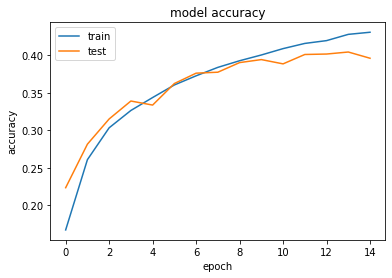

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# plt.savefig('benchmarks/epoch_.png', dpi=300, bbox_inches='tight')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Çıkarılan notlar

Model aynı kalmak şartıya epoch sayısını spamlamnın bir yararı yok bir esikten sonra modelin basarımı artmıyor.